<a href="https://colab.research.google.com/github/gabtns/Proyectos-de-Machine-Learning/blob/main/Sucursales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/proyecto1.csv")
df.head(1)

,Unnamed: 0,B_mes,fec_ini_cdto,id_sucursal,B_adeudo,ventas_tot,no_clientes,adeudo_actual,pagos_tot,no_cdtos
0,1,2020-01-15,2020-01-01,1,Con adeudo,27427,5,9117.21,18442.62,21


In [ ]:
df['B_mes'].unique()

array(['2020-01-15', '2020-02-15', '2020-03-15', '2020-04-15',
       '2020-05-15', '2020-06-15', '2020-07-15', '2020-08-15',
       '2020-09-15', '2020-10-15', '2020-11-15', '2020-12-15'],
      dtype=object)

In [ ]:
df['B_mes']=pd.to_datetime(df['B_mes'])

In [ ]:
df['fec_ini_cdto']=pd.to_datetime(df['fec_ini_cdto'])

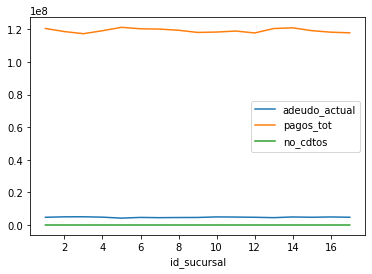

In [ ]:
df.groupby("id_sucursal")[['adeudo_actual','pagos_tot','no_cdtos']].sum().plot()

In [ ]:
df['año']=df.B_mes.dt.year
df['mes']=df.B_mes.dt.month_name()

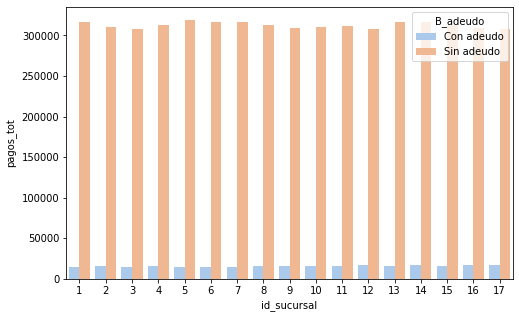

In [ ]:
fig=plt.figure(figsize=(8,5))
sns.barplot(x="id_sucursal", y="pagos_tot",data=df,ci=None,hue="B_adeudo",palette="pastel")

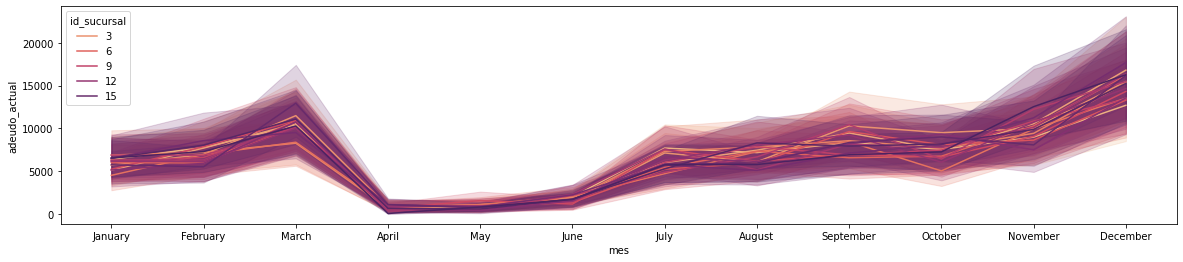

In [ ]:
fig=plt.figure(figsize=(20,4))
sns.lineplot(x=df['mes'], y="adeudo_actual",data=df,palette="flare",hue="id_sucursal",legend="brief")

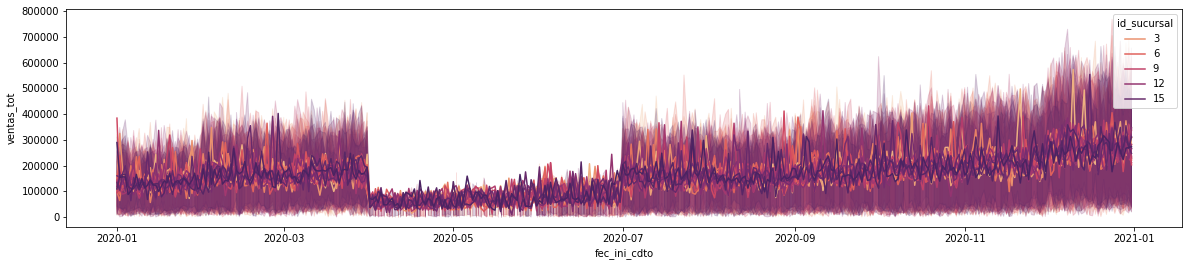

In [ ]:
fig=plt.figure(figsize=(20,4))
sns.lineplot(x=df['fec_ini_cdto'], y="ventas_tot",data=df,palette="flare",hue="id_sucursal",legend="brief")

In [ ]:
data=pd.pivot_table(data= df, values="adeudo_actual", index="mes", columns="id_sucursal", aggfunc= "count",
                    fill_value=None, margins=False, dropna=True, margins_name="All", observed=False, sort=True)

In [ ]:
data.fillna(0)

id_sucursal,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
mes,,,,,,,,,,,,,,,,,
April,39,40,37,42,41,39,42,38,40,39,37,42,39,47,45,42,33
August,60,60,61,62,59,59,61,60,61,61,61,60,61,60,60,60,60
December,60,62,62,62,62,62,62,62,62,62,62,62,62,62,61,61,62
February,57,58,56,56,56,55,58,56,57,57,58,56,56,56,56,56,57
January,60,60,58,60,58,61,59,60,59,62,62,59,62,62,60,62,61
July,61,61,60,59,58,62,58,59,59,62,58,60,61,61,59,59,59
June,48,47,45,48,45,51,45,46,48,47,50,43,50,47,46,46,47
March,62,62,62,61,62,61,61,62,62,62,62,62,60,62,62,62,61
May,41,40,43,45,41,39,41,42,40,41,42,40,38,41,42,42,42


In [ ]:
data.sort_values("mes",ascending=True)

id_sucursal,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
mes,,,,,,,,,,,,,,,,,
April,39,40,37,42,41,39,42,38,40,39,37,42,39,47,45,42,33
August,60,60,61,62,59,59,61,60,61,61,61,60,61,60,60,60,60
December,60,62,62,62,62,62,62,62,62,62,62,62,62,62,61,61,62
February,57,58,56,56,56,55,58,56,57,57,58,56,56,56,56,56,57
January,60,60,58,60,58,61,59,60,59,62,62,59,62,62,60,62,61
July,61,61,60,59,58,62,58,59,59,62,58,60,61,61,59,59,59
June,48,47,45,48,45,51,45,46,48,47,50,43,50,47,46,46,47
March,62,62,62,61,62,61,61,62,62,62,62,62,60,62,62,62,61
May,41,40,43,45,41,39,41,42,40,41,42,40,38,41,42,42,42


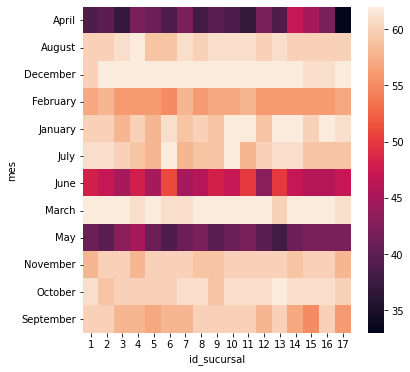

In [ ]:
fig=plt.figure(figsize=(6,6))
sns.heatmap(data)